In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import chi2_contingency
from scipy.stats import zscore

# Análise Exploratória 

In [37]:
dados = pd.read_csv("C:/Projetos Pessoais/DataScience/analise_Previsao_Churn_teleComunicacoes/dados/dataSet_TeleComunicacoes_brutos.csv")

In [136]:
dados.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5444,Male,0,Yes,No,45,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),107.75,4882.80,No
5932,Male,0,Yes,No,5,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.45,498.10,Yes
5837,Female,0,No,No,2,No,No phone service,DSL,No,Yes,No,No,Yes,Yes,Month-to-month,No,Electronic check,51.40,96.80,No
6937,Female,0,No,No,28,No,No phone service,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.40,No
3624,Female,1,Yes,Yes,62,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),96.10,6019.35,No
5283,Female,0,No,Yes,19,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,No,Mailed check,48.80,953.65,No
2201,Female,0,No,No,36,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,One year,No,Bank transfer (automatic),85.85,3003.55,No
1046,Female,0,No,No,52,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,No,One year,No,Credit card (automatic),74.00,3877.65,No
3410,Male,0,No,No,3,Yes,No,DSL,No,No,No,No,Yes,No,Month-to-month,No,Credit card (automatic),53.40,188.70,Yes
3020,Male,0,No,Yes,33,No,No phone service,DSL,Yes,No,No,Yes,No,No,One year,No,Credit card (automatic),34.05,1113.95,No


In [39]:
dados.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [40]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [47]:
dados.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [77]:
# Convertendo 'TotalCharges' para float
dados['TotalCharges'] = dados['TotalCharges'].replace('', pd.NA)
dados['TotalCharges'] = pd.to_numeric(dados['TotalCharges'], errors='coerce')

In [79]:
dados.TotalCharges.dtype

dtype('float64')

In [82]:
# Mudando type de 'SeniorCitizen' para tipo object pois é categórica
dados['SeniorCitizen'] = dados['SeniorCitizen'].astype(str)
dados.SeniorCitizen.dtype

dtype('O')

In [83]:
dados.info(

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [98]:
dados.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [103]:
# Separação de colunas numéricas e categóricas e variável target

cats = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

nums = ['tenure','MonthlyCharges','TotalCharges']

target = ['Churn']

## Explorando Variáveis numéricas

In [114]:
dados[cats].describe()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [112]:
dados[nums].corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.00000,0.247900,0.825880
MonthlyCharges,0.24790,1.000000,0.651065
TotalCharges,0.82588,0.651065,1.000000


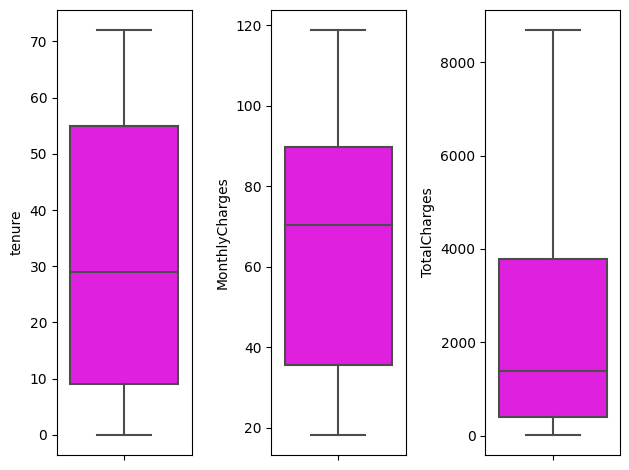

In [108]:
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i + 1)
    sns.boxplot(y = dados[features[i]], color = 'magenta', orient = 'v')
    plt.tight_layout()

## Explorando Variáveis Categóricas

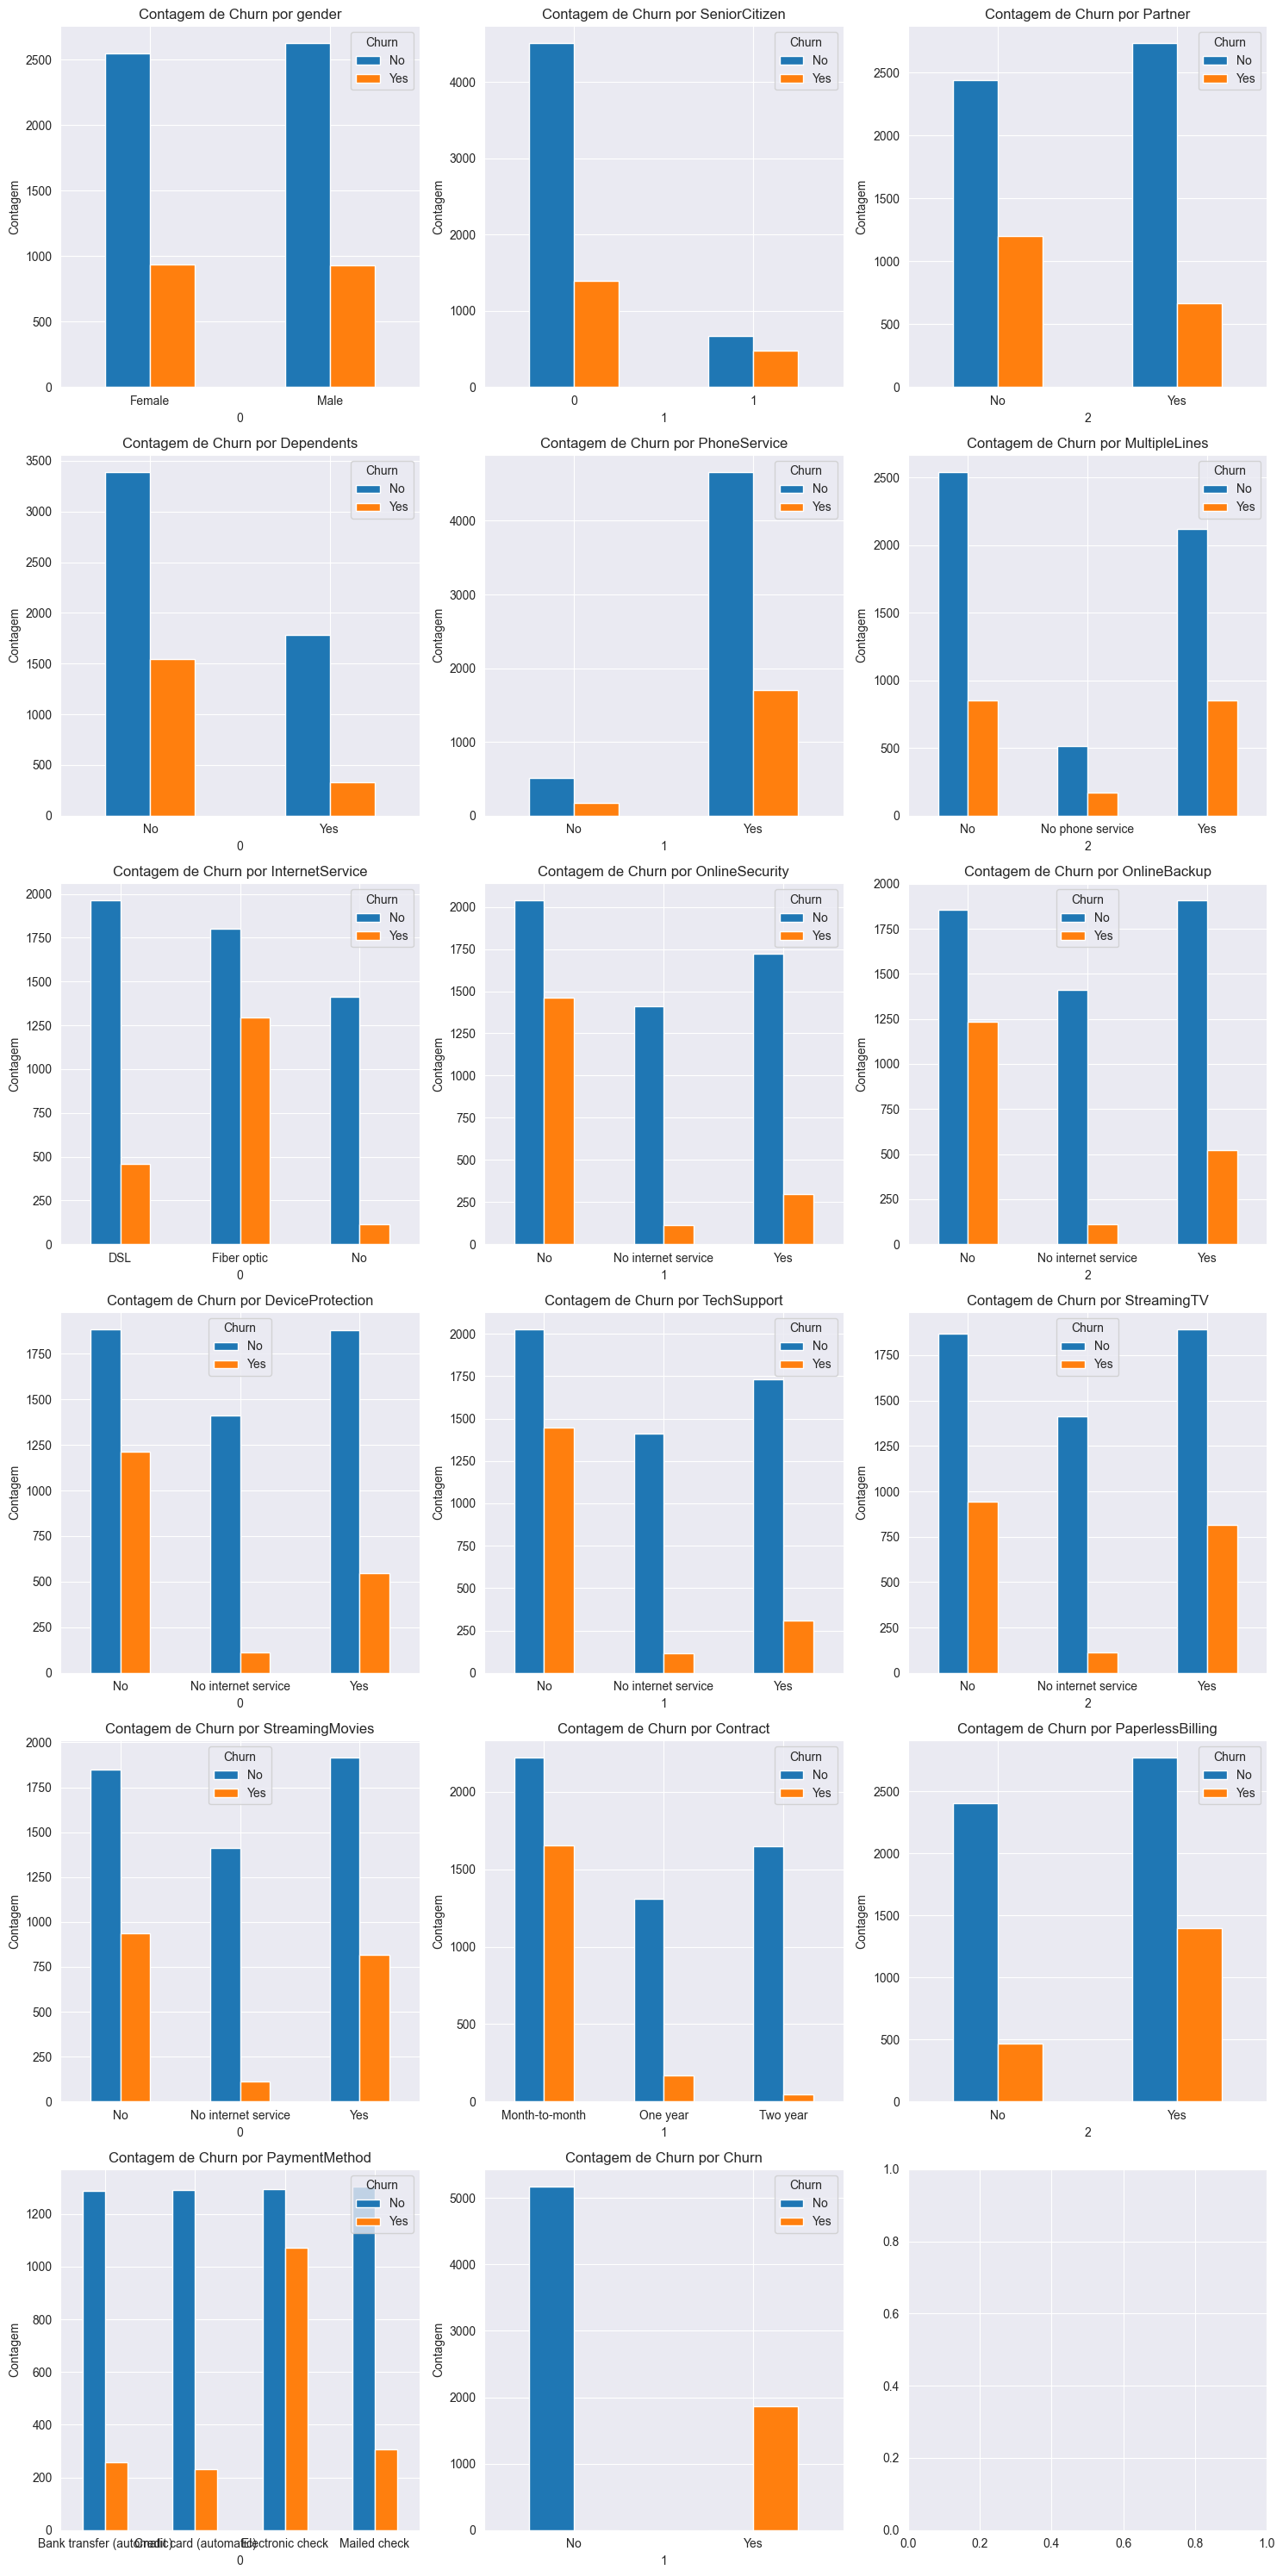

In [129]:
num_colunas_por_linha = 3
num_linhas = (len(cats) + num_colunas_por_linha - 1) // num_colunas_por_linha

# Criar subplots
fig, axes = plt.subplots(num_linhas, num_colunas_por_linha, figsize=(15, 5 * num_linhas))
fig.subplots_adjust(hspace=0.5)

# Iterar pelas colunas categóricas e criar os gráficos
for i, col in enumerate(cats):
    row = i // num_colunas_por_linha
    col = i % num_colunas_por_linha
    contingency_table = pd.crosstab(dados[cats[i]], dados['Churn'])  # Correção aqui
    ax = contingency_table.plot(kind='bar', ax=axes[row, col])
    ax.set_title(f'Contagem de Churn por {cats[i]}')
    ax.set_xlabel(col)
    ax.set_ylabel('Contagem')
    ax.legend(title='Churn')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Ajustar layout
plt.tight_layout()
plt.show()

 - Conclusão sumária: 
        Variável Gender aparentemente não possui relevância para a variável target
        

# Engenharia de Atributos